# Using the Last.fm API to work on tagging

In [5]:
import spotipy
import requests
import credentials
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from collections import Counter

In [6]:
SPOTIFY_API_BASE_URL = "https://api.spotify.com/v1/"
LASTFM_API_BASE_URL = "https://ws.audioscrobbler.com/2.0/"

def get_track_info(track_id, sp):
    # Get track info from Spotify
    track = sp.track(track_id)
    artist_name = track['artists'][0]['name']
    track_name = track['name']
    return artist_name, track_name

def get_top_tags(artist_name, track_name, api_key):
    # Get top tags for track from Last.fm
    payload = {
        "method": "track.getTopTags",
        "artist": artist_name,
        "track": track_name,
        "api_key": api_key,
        "format": "json"
    }
    response = requests.get(LASTFM_API_BASE_URL, params=payload)
    tags = [tag['name'] for tag in response.json()['toptags']['tag']]
    return tags


In [7]:
# Set up credentials and parameters
auth_manager = SpotifyClientCredentials(client_id=credentials.SPOTIPY_CLIENT_ID, client_secret=credentials.SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)
track_id = "3n3Ppam7vgaVa1iaRUc9Lp"
lastfm_api_key = credentials.LAST_FM_KEY

# Get track info from Spotify
artist_name, track_name = get_track_info(track_id, sp)

# Get top tags for track from Last.fm
tags = get_top_tags(artist_name, track_name, lastfm_api_key)

# Print list of tags
print(tags)

['rock', 'indie', 'indie rock', 'alternative', 'alternative rock', 'The Killers', '00s', 'favorites', 'pop', 'american', 'Mr brightside', 'Killers', 'Love', 'pop rock', 'Awesome', 'catchy', 'dance', 'indie pop', 'Favourites', 'seen live', 'upbeat', 'jealousy', 'male vocalists', 'FUCKING AWESOME', 'Energetic', '2004', 'british', 'favorite songs', 'new wave', 'britpop', '<3', 'Favorite', 'happy', 'amazing', 'punk', 'party', 'sad', '2000s', 'synth rock', 'mr. brightside', 'loved', 'male vocalist', 'Soundtrack', 'electronic', 'classic', 'memories', 'best song ever', 'emo', 'Indie-Rock', 'favourite', 'cool', 'the oc', 'Love it', 'Post-punk revival', 'Driving', 'punk rock', 'heard on Pandora', 'guilty pleasure', 'dance rock', 'Hot Fuss', 'energy', 'love at first listen', 'Favourite Songs', 'Makes Me Smile', 'summer', 'emotional', 'fun', 'alt rock', 'makes me wanna dance', 'chill', 'post-punk', 'synth', 'great', 'melancholy', 'glam', 'Pop-Rock', 'rock band', '5 Stars', 'nostalgia', 'all time 

## Combining this with data visualizaiton

In [8]:
# Spotify Generated Playlists
happy_ids = ["37i9dQZF1DX3rxVfibe1L0","37i9dQZF1DX7KNKjOK0o75","37i9dQZF1DWYBO1MoTDhZI","37i9dQZF1DX4fpCWaHOned",
    "37i9dQZF1DWSf2RDTDayIx","37i9dQZF1DX9XIFQuFvzM4","37i9dQZF1DX2sUQwD7tbmL","37i9dQZF1DX1BzILRveYHb"]
sad_ids = ["37i9dQZF1DX7qK8ma5wgG1","37i9dQZF1DX3YSRoSdA634","37i9dQZF1DX59NCqCqJtoH","37i9dQZF1DX64Y3du11rR1",
    "37i9dQZF1DX6xZZEgC9Ubl","37i9dQZF1DWW2hj3ZtMbuO","37i9dQZF1DWX83CujKHHOn","37i9dQZF1DX15JKV0q7shD"]
romantic_ids = ["37i9dQZF1DX5IDTimEWoTd","37i9dQZF1DXbEm2sKzgoJ8","37i9dQZF1DX6mvEU1S6INL","37i9dQZF1DWTbzY5gOVvKd",
    "37i9dQZF1DX38lOuCWlLV1","37i9dQZF1DWSRc3WJklgBs","37i9dQZF1DXcbAIldMQMIs","37i9dQZF1DWXqpDKK4ed9O","37i9dQZF1DX8WMG8VPSOJC"]
party_ids = ["37i9dQZF1DXa2PvUpywmrr","37i9dQZF1DX8ky12eWIvcW","37i9dQZF1DWY4xHQp97fN6","37i9dQZF1DXaXB8fQg7xif",
   "37i9dQZF1DWY7IeIP1cdjF", "37i9dQZF1DWZCdOD1jAvLL","37i9dQZF1DX5I05jXm1F2M","37i9dQZF1DX0VfLbJWWGKr"]

In [9]:
username = 'spotify'

In [10]:
def create_df(mood_ids):
    playlist_features_list = ["name","tracks","artists",'avg_danceability', 'avg_energy',
        'avg_loudness', 'avg_acousticness', 'avg_instrumentalness','avg_liveness', 'avg_valence' ,'avg_tempo']
    playlists = pd.DataFrame(columns = playlist_features_list)

    for p in range(len(mood_ids)):
        # get the tracks and artists
        playlist_tracks = []
        artists = []
        tracks_raw = sp.user_playlist_tracks(username, mood_ids[p])
        for i in range(len(tracks_raw)):
            song_id = tracks_raw['items'][i]['track']['uri']
            song_id = song_id.replace("spotify:track:", "")
            playlist_tracks.append(song_id)
            artist_id = tracks_raw['items'][i]['track']['artists'][0]['uri']
            artist_id = artist_id.replace("spotify:artist:", "")
            artists.append(artist_id)
        
        audio_features = []
        # Loop through every track in the playlist, extract features and append the features to the playlist df
        for track in playlist_tracks:
            # Get audio features
            audio_features.append(sp.audio_features(track))
        audio_keys = []
        for d in audio_features[0]:
            audio_keys.extend(d.keys())
        audio_features_df = pd.DataFrame(audio_features[0], columns = audio_keys)
        for x in range(1, len(audio_features)):
            audio_features_df_single = pd.DataFrame(audio_features[x], columns = audio_keys)
            audio_features_df = pd.concat([audio_features_df, audio_features_df_single], ignore_index = True)

        # take the lists and make them into a strong
        artists = ' '.join(artists)
        playlist_tracks = ' '.join(playlist_tracks)

        playlist_data = {'name': mood_ids[p],
            'tracks': playlist_tracks,
            'artists': artists,
            'avg_danceability': audio_features_df['danceability'].mean(),
            'avg_energy':audio_features_df['energy'].mean(),
        'avg_loudness': audio_features_df['loudness'].mean(),
            'avg_acousticness': audio_features_df['acousticness'].mean(), 
            'avg_instrumentalness': audio_features_df['instrumentalness'].mean(),
            'avg_liveness': audio_features_df['liveness'].mean(),
            'avg_valence' : audio_features_df['valence'].mean() ,
            'avg_tempo':  audio_features_df['tempo'].mean()}
        playlist_df = pd.DataFrame(playlist_data, index = [0])

        playlists = pd.concat([playlists, playlist_df], axis = 0, ignore_index = True)
    return playlists

In [11]:
happy_playlists = create_df(happy_ids)
sad_playlists = create_df(sad_ids)
romantic_playlists = create_df(romantic_ids)
party_playlists = create_df(party_ids)

In [12]:
def mood_songs(tracks_series):
    # Initialize the list to store all the tracks
    tracks = []

    # Loop over each string in the list and split it into smaller strings
    for string in tracks_series:
        # Split the string into a list of smaller strings
        string_split = string.split()
        # Add the smaller strings to the tracks list
        tracks.extend(string_split)

    audio_features = []
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    for track in tracks:
        # Get audio features
        audio_features.append(sp.audio_features(track))
    audio_keys = []
    for d in audio_features[0]:
        audio_keys.extend(d.keys())
    audio_features_df = pd.DataFrame(audio_features[0], columns = audio_keys)
    for x in range(1, len(audio_features)):
        audio_features_df_single = pd.DataFrame(audio_features[x], columns = audio_keys)
        audio_features_df = pd.concat([audio_features_df, audio_features_df_single], ignore_index = True)
    return audio_features_df

In [13]:
# Get the songs
happy_songs = mood_songs(happy_playlists['tracks'])
sad_songs = mood_songs(sad_playlists['tracks'])
romantic_songs = mood_songs(romantic_playlists['tracks'])
party_songs = mood_songs(party_playlists['tracks'])

# Tagging
The goal here is to now be able to get the tags for all the songs in each of the "moods", and do a bar plot with occorance

In [14]:
def tags_list(songs_list,sp,lastfm_api_key):
    tracks = []
     # Loop over each string in the list and split it into smaller strings
    for string in songs_list:
        # Split the string into a list of smaller strings
        string_split = string.split()
        # Add the smaller strings to the tracks list
        tracks.extend(string_split)
    tags = []
    for track_id in tracks:
        # Get track info from Spotify
        artist_name, track_name = get_track_info(track_id, sp)

        # Get top tags for track from Last.fm
        tag_list = get_top_tags(artist_name, track_name, lastfm_api_key)
        for tag in tag_list:
            tags.append(tag)
    return tags

In [15]:
happy_tags = tags_list(happy_playlists['tracks'],sp,lastfm_api_key)
sad_tags = tags_list(sad_playlists['tracks'],sp,lastfm_api_key)
romantic_tags = tags_list(romantic_playlists['tracks'],sp,lastfm_api_key)
party_tags = tags_list(party_playlists['tracks'],sp,lastfm_api_key)

In [16]:
#print(happy_tags)

## Graphing

In [17]:
import matplotlib.pyplot as plt
from collections import Counter

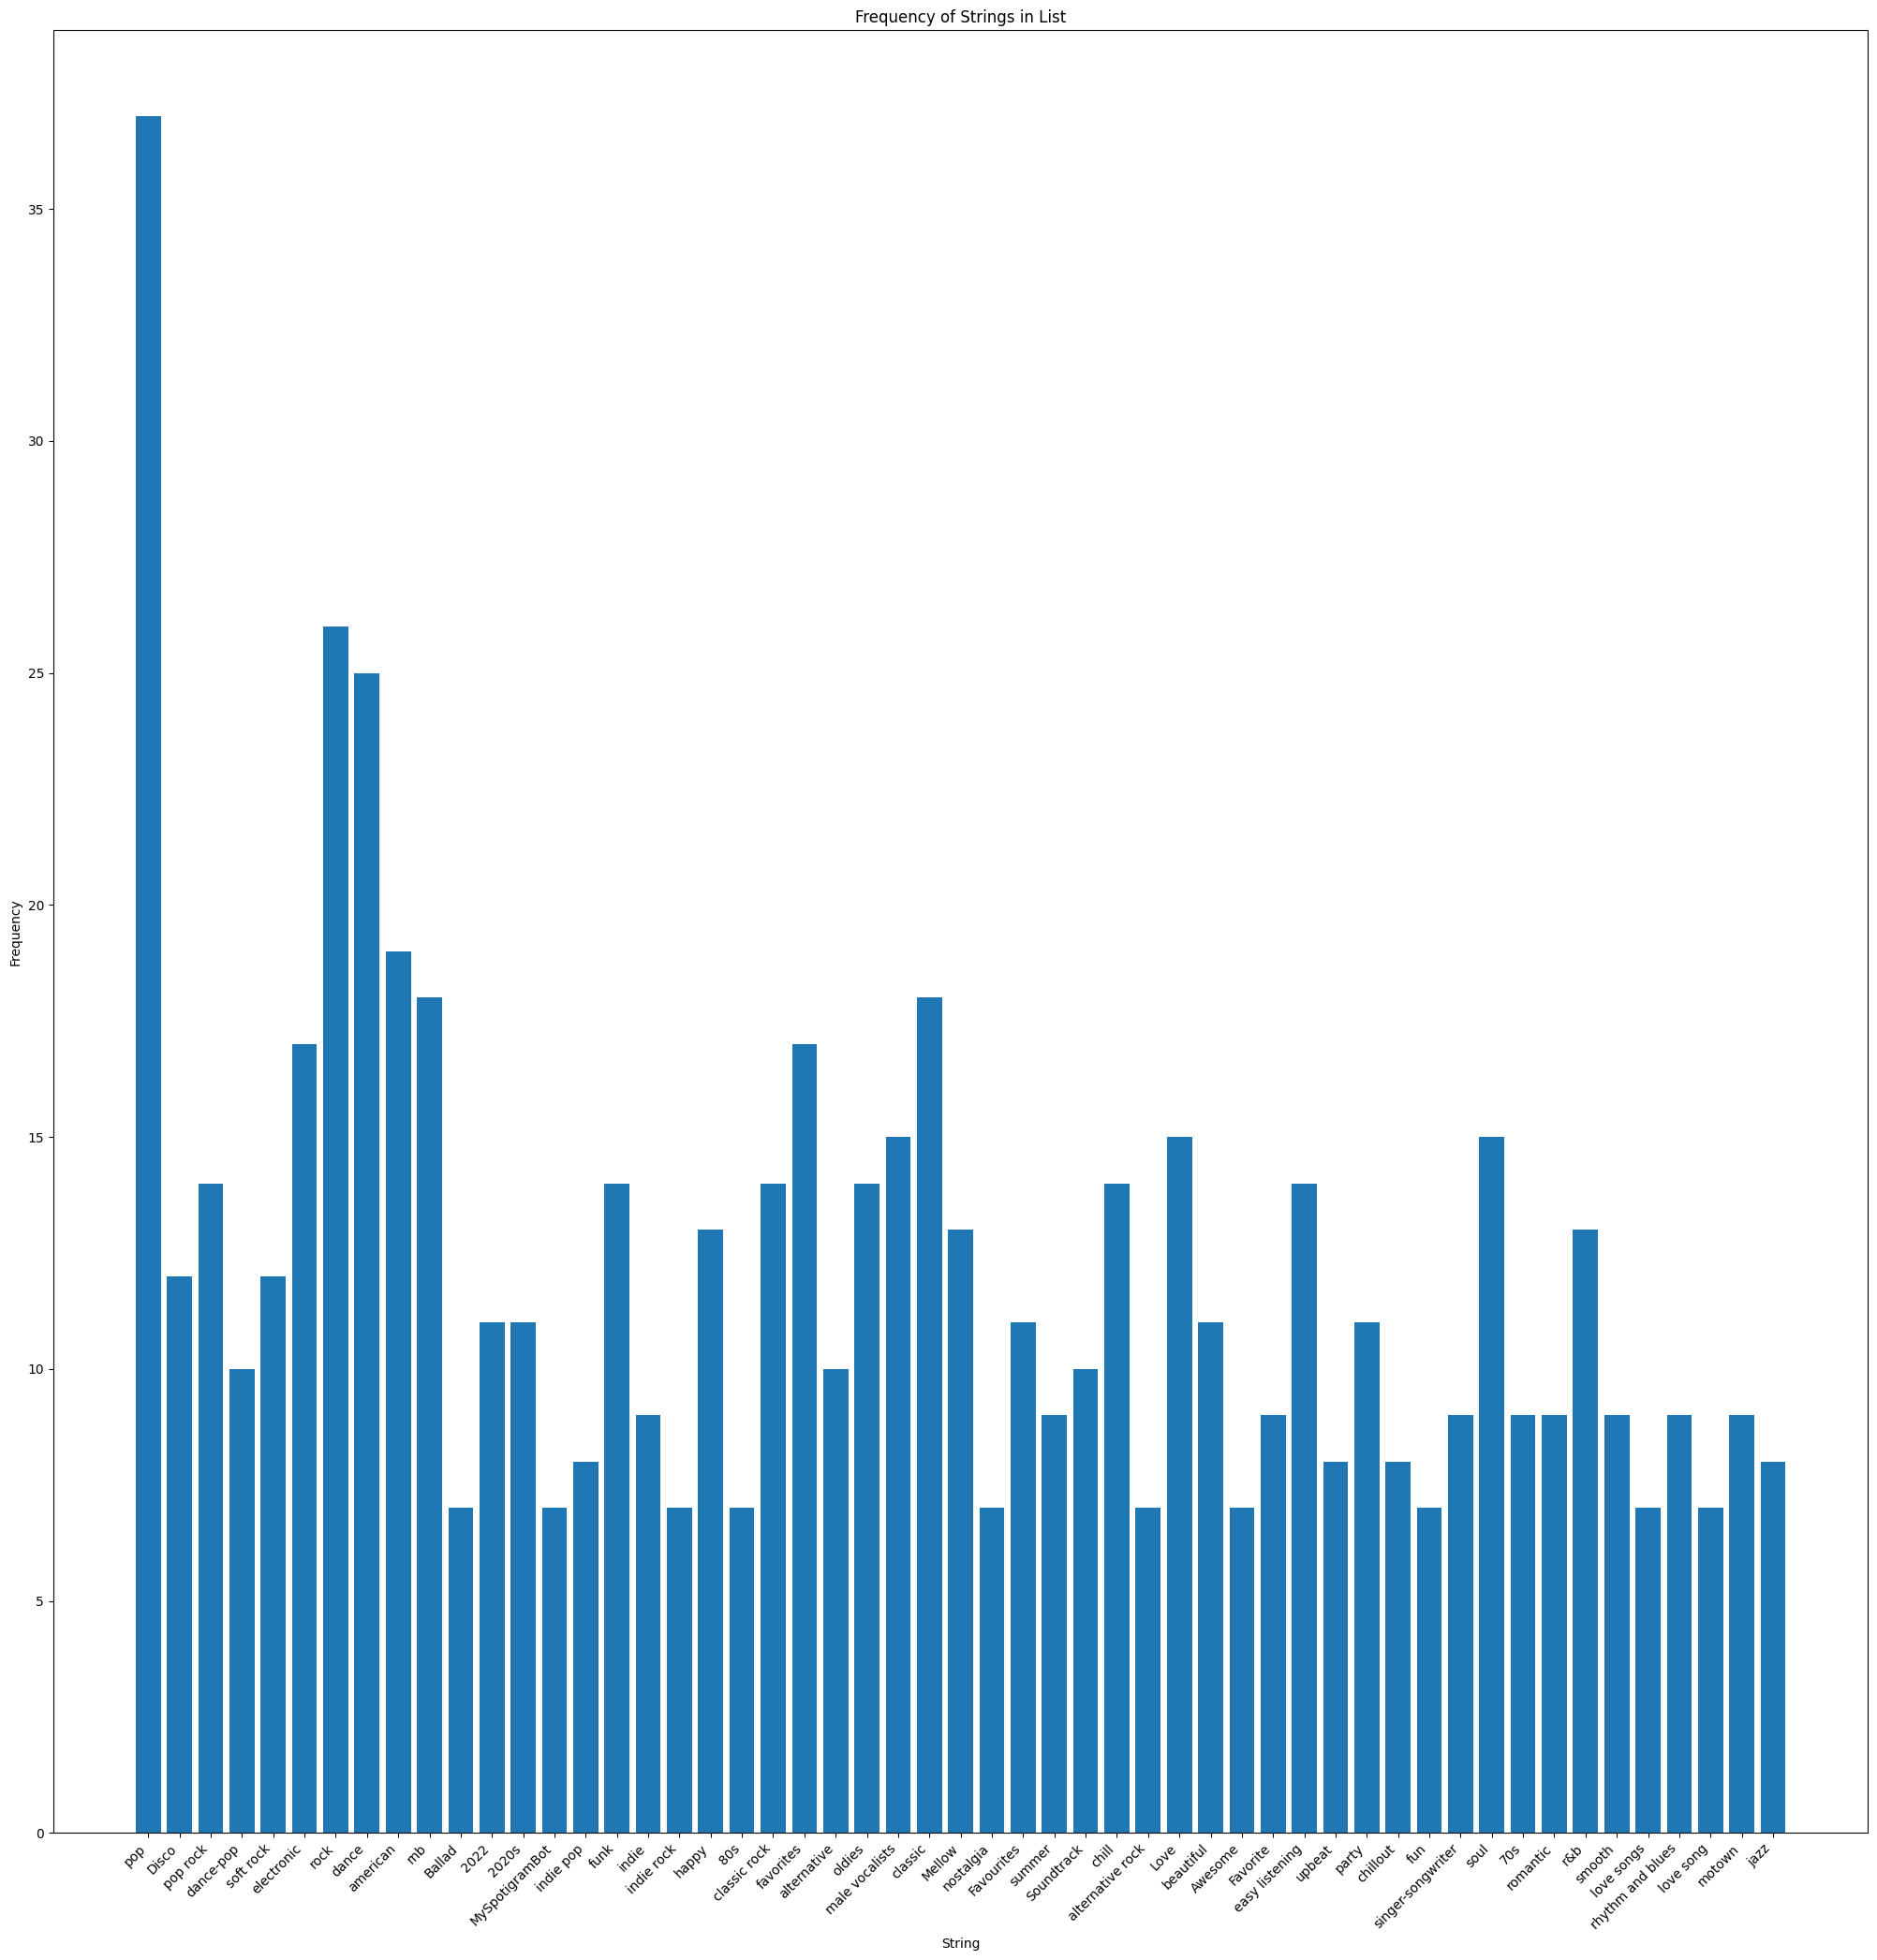

In [18]:
# Count the frequency of each string in the list
string_counts = Counter(happy_tags)

# Filter out strings that appear less than 2 times
string_counts = {k: v for k, v in string_counts.items() if v >= 7}

# Get the unique strings and their frequencies
unique_strings = list(string_counts.keys())
frequencies = list(string_counts.values())

# Create a bar plot
fig, ax = plt.subplots()
fig.set_figheight(25)
fig.set_figwidth(25)
ax.bar(unique_strings, frequencies)

# Set the x-axis label, y-axis label, and title
ax.set_xlabel('String')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Strings in List')

# Rotate the x-axis labels if necessary
if len(unique_strings) > 10:
    plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


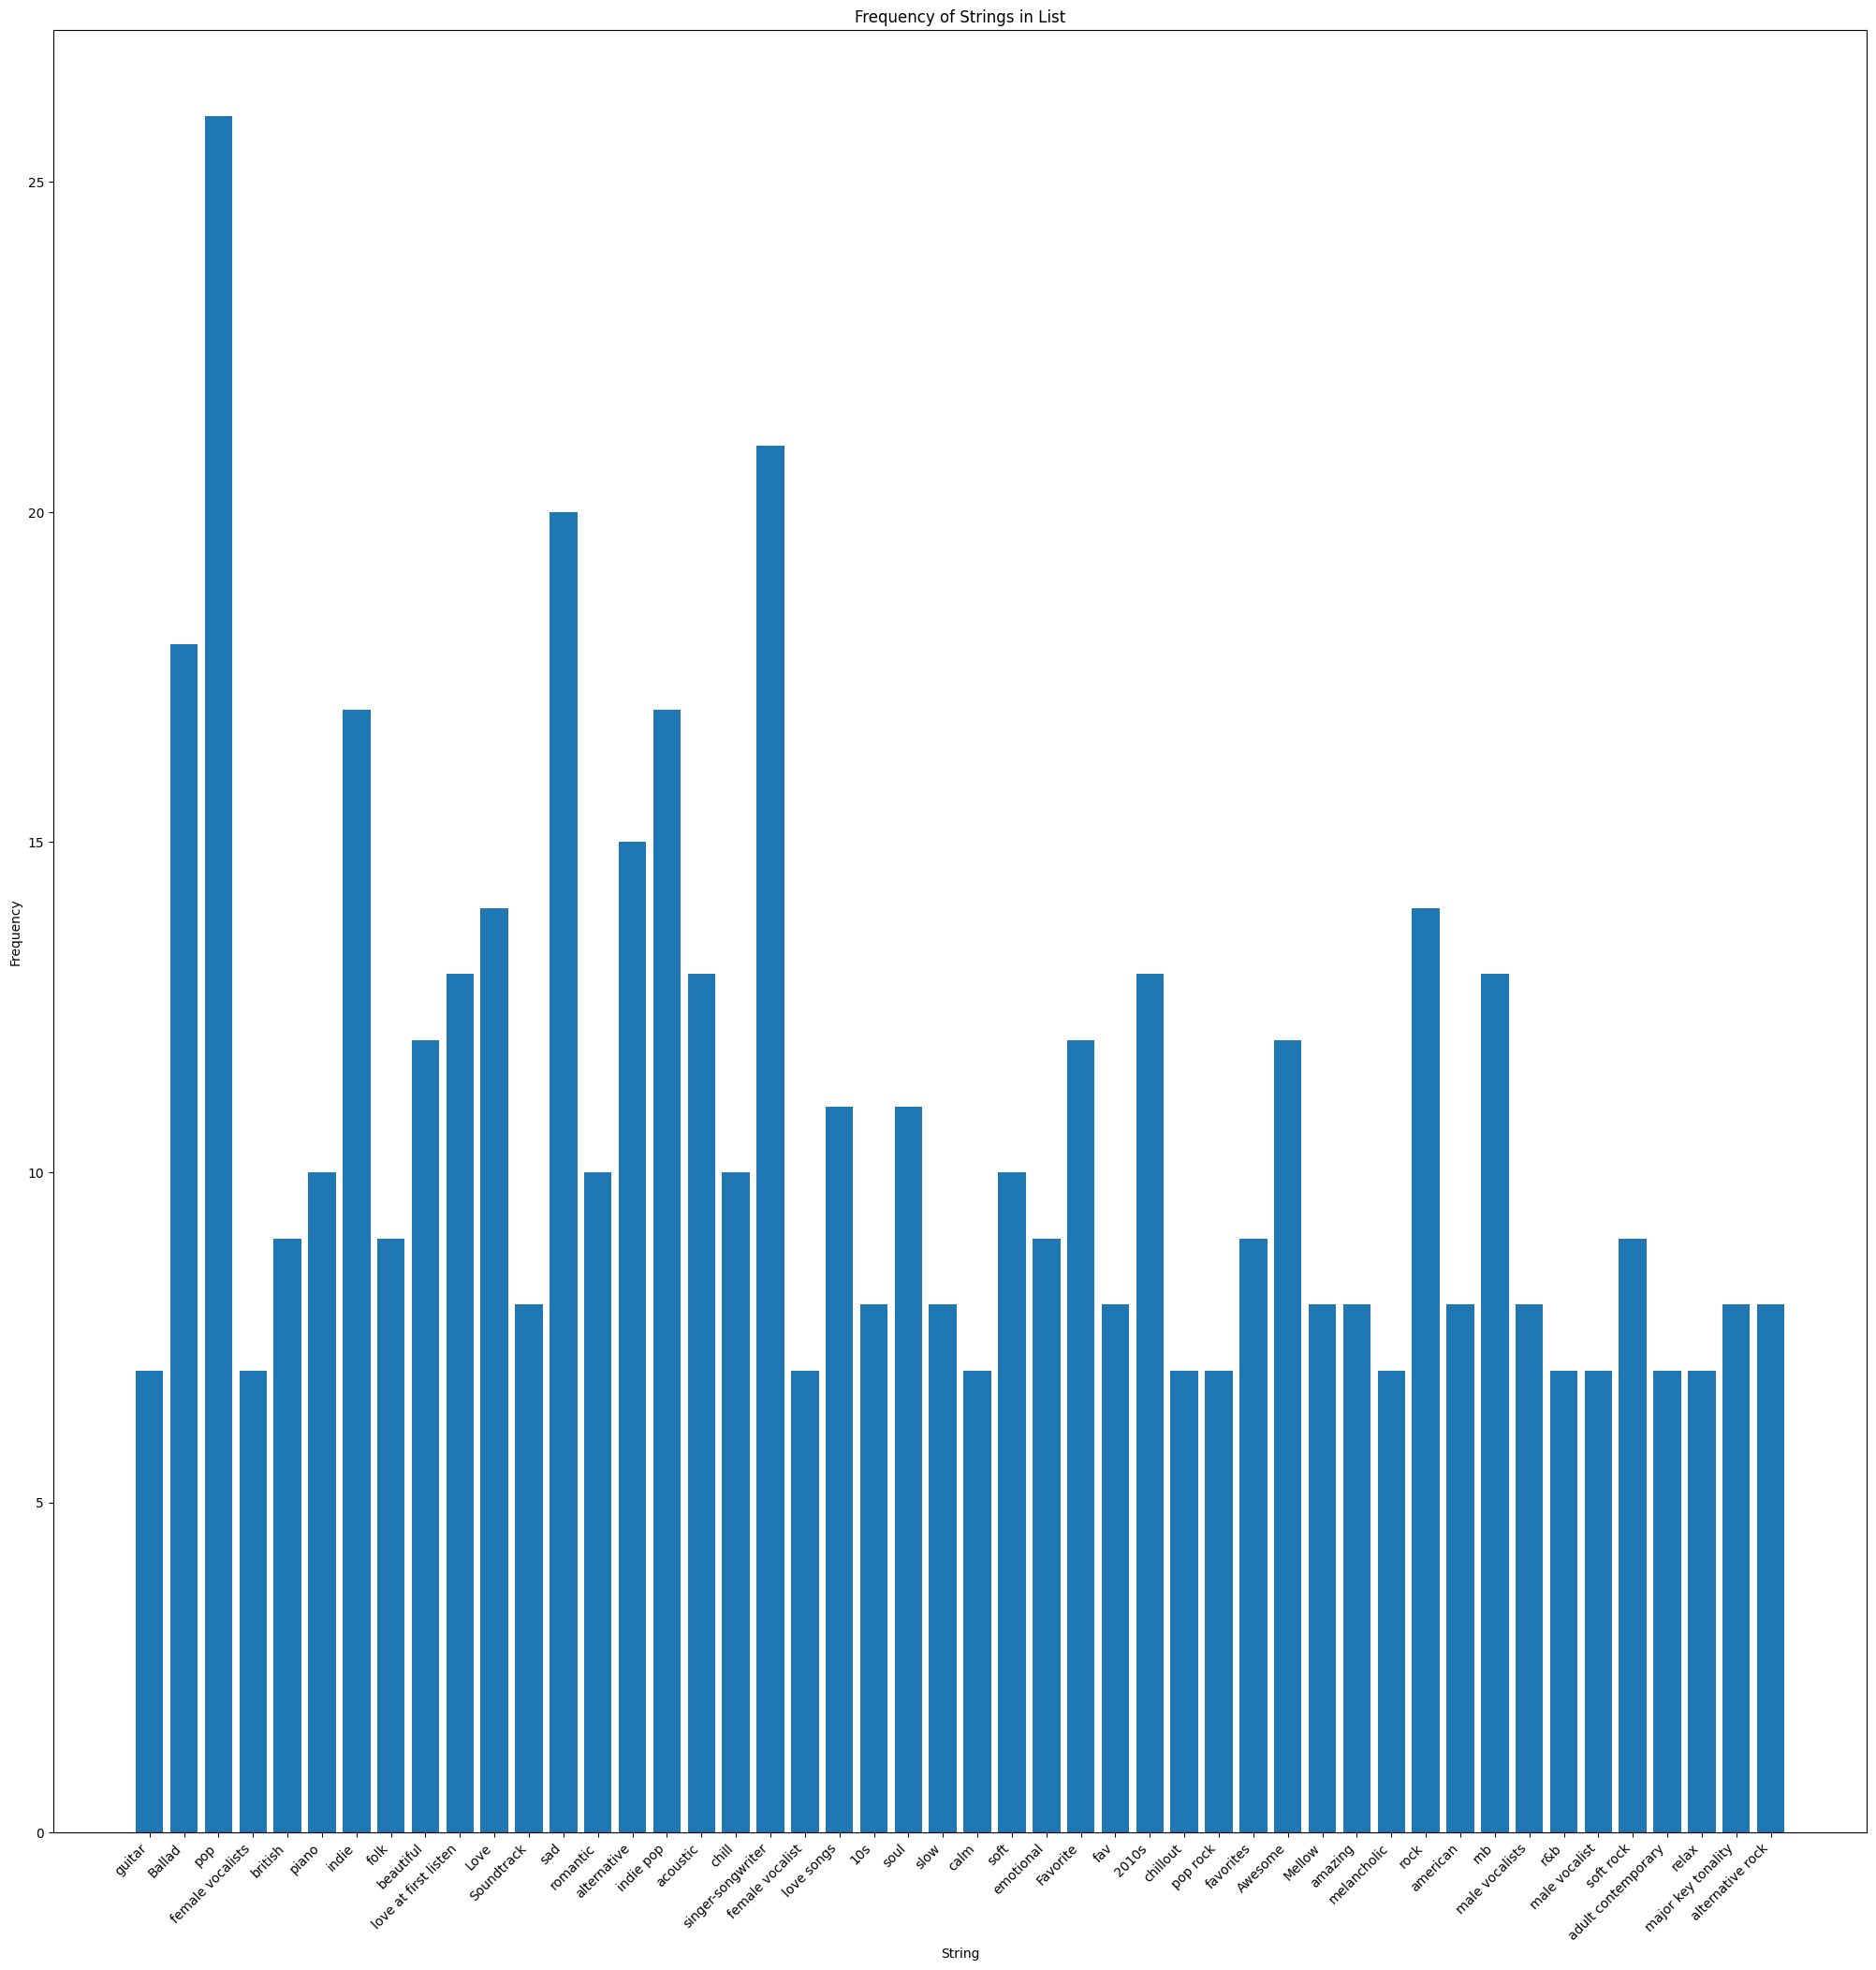

In [19]:
# Count the frequency of each string in the list
string_counts = Counter(sad_tags)

# Filter out strings that appear less than 2 times
string_counts = {k: v for k, v in string_counts.items() if v >= 7}

# Get the unique strings and their frequencies
unique_strings = list(string_counts.keys())
frequencies = list(string_counts.values())

# Create a bar plot
fig, ax = plt.subplots()
fig.set_figheight(25)
fig.set_figwidth(25)
ax.bar(unique_strings, frequencies)

# Set the x-axis label, y-axis label, and title
ax.set_xlabel('String')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Strings in List')

# Rotate the x-axis labels if necessary
if len(unique_strings) > 10:
    plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Next Steps
1. For each spotify generated playlist, see the tags that occur more than 50% of the time

In [20]:
username = 'spotify'
# sptoify generated playlists
happy_ids = ["37i9dQZF1DX3rxVfibe1L0","37i9dQZF1DX7KNKjOK0o75","37i9dQZF1DWYBO1MoTDhZI","37i9dQZF1DX4fpCWaHOned",
    "37i9dQZF1DWSf2RDTDayIx","37i9dQZF1DX9XIFQuFvzM4","37i9dQZF1DX2sUQwD7tbmL","37i9dQZF1DX1BzILRveYHb"]
sad_ids = ["37i9dQZF1DX7qK8ma5wgG1","37i9dQZF1DX3YSRoSdA634","37i9dQZF1DX59NCqCqJtoH","37i9dQZF1DX64Y3du11rR1",
    "37i9dQZF1DX6xZZEgC9Ubl","37i9dQZF1DWW2hj3ZtMbuO","37i9dQZF1DWX83CujKHHOn","37i9dQZF1DX15JKV0q7shD"]
romantic_ids = ["37i9dQZF1DX5IDTimEWoTd","37i9dQZF1DXbEm2sKzgoJ8","37i9dQZF1DX6mvEU1S6INL","37i9dQZF1DWTbzY5gOVvKd",
    "37i9dQZF1DX38lOuCWlLV1","37i9dQZF1DWSRc3WJklgBs","37i9dQZF1DXcbAIldMQMIs","37i9dQZF1DWXqpDKK4ed9O","37i9dQZF1DX8WMG8VPSOJC"]
party_ids = ["37i9dQZF1DXa2PvUpywmrr","37i9dQZF1DX8ky12eWIvcW","37i9dQZF1DWY4xHQp97fN6","37i9dQZF1DXaXB8fQg7xif",
   "37i9dQZF1DWY7IeIP1cdjF", "37i9dQZF1DWZCdOD1jAvLL","37i9dQZF1DX5I05jXm1F2M","37i9dQZF1DX0VfLbJWWGKr"]


In [21]:
def create_df(mood_ids):
    playlist_features_list = ["name","tracks","artists",'avg_danceability', 'avg_energy',
        'avg_loudness', 'avg_acousticness', 'avg_instrumentalness','avg_liveness', 'avg_valence' ,'avg_tempo']
    playlists = pd.DataFrame(columns = playlist_features_list)

    for p in range(len(mood_ids)):
        # get the tracks and artists
        playlist_tracks = []
        artists = []
        tracks_raw = sp.user_playlist_tracks(username, mood_ids[p])
        for i in range(len(tracks_raw)):
            song_id = tracks_raw['items'][i]['track']['uri']
            song_id = song_id.replace("spotify:track:", "")
            playlist_tracks.append(song_id)
            artist_id = tracks_raw['items'][i]['track']['artists'][0]['uri']
            artist_id = artist_id.replace("spotify:artist:", "")
            artists.append(artist_id)
        
        audio_features = []
        # Loop through every track in the playlist, extract features and append the features to the playlist df
        for track in playlist_tracks:
            # Get audio features
            audio_features.append(sp.audio_features(track))
        audio_keys = []
        for d in audio_features[0]:
            audio_keys.extend(d.keys())
        audio_features_df = pd.DataFrame(audio_features[0], columns = audio_keys)
        for x in range(1, len(audio_features)):
            audio_features_df_single = pd.DataFrame(audio_features[x], columns = audio_keys)
            audio_features_df = pd.concat([audio_features_df, audio_features_df_single], ignore_index = True)

        # take the lists and make them into a strong
        artists = ' '.join(artists)
        playlist_tracks = ' '.join(playlist_tracks)

        playlist_data = {'name': mood_ids[p],
            'tracks': playlist_tracks,
            'artists': artists,
            'avg_danceability': audio_features_df['danceability'].mean(),
            'avg_energy':audio_features_df['energy'].mean(),
        'avg_loudness': audio_features_df['loudness'].mean(),
            'avg_acousticness': audio_features_df['acousticness'].mean(), 
            'avg_instrumentalness': audio_features_df['instrumentalness'].mean(),
            'avg_liveness': audio_features_df['liveness'].mean(),
            'avg_valence' : audio_features_df['valence'].mean() ,
            'avg_tempo':  audio_features_df['tempo'].mean()}
        playlist_df = pd.DataFrame(playlist_data, index = [0])

        playlists = pd.concat([playlists, playlist_df], axis = 0, ignore_index = True)
    return playlists

In [22]:
happy_playlists = create_df(happy_ids)
sad_playlists = create_df(sad_ids)
romantic_playlists = create_df(romantic_ids)
party_playlists = create_df(party_ids)

In [23]:
def mood_songs(tracks_series):
    # Initialize the list to store all the tracks
    tracks = []

    # Loop over each string in the list and split it into smaller strings
    for string in tracks_series:
        # Split the string into a list of smaller strings
        string_split = string.split()
        # Add the smaller strings to the tracks list
        tracks.extend(string_split)

    return tracks

In [24]:
# Print the tracks list
happy_songs = mood_songs(happy_playlists['tracks'])
sad_songs = mood_songs(sad_playlists['tracks'])
romantic_songs = mood_songs(romantic_playlists['tracks'])
party_songs = mood_songs(party_playlists['tracks'])

In [25]:
def top_tags(percentage, songs_list,sp,lastfm_api_key):
    top_tags = []
    num_songs = len(songs_list)
    tags = tags_list(songs_list,sp,lastfm_api_key)

    # count the occurrences of each tag
    tag_counts = Counter(tags)

    # calculate the threshold frequency for tags to be considered "top tags"
    threshold_freq = num_songs * percentage

    # create a new list of top tags
    top_tags = [tag for tag, count in tag_counts.items() if count >= threshold_freq]
    
    return top_tags

In [26]:
happy_tags = top_tags(0.25,happy_songs,sp,credentials.LAST_FM_KEY)

In [75]:
print(top_tags(0.25,sad_songs,sp,credentials.LAST_FM_KEY))

['Ballad', 'pop', 'indie', 'Love', 'sad', 'alternative', 'indie pop', 'singer-songwriter', 'rock']


In [76]:
print(top_tags(0.15,romantic_songs,sp,credentials.LAST_FM_KEY))

['indie', 'soul', 'pop', 'Love', 'rnb', 'chill', 'Mellow', 'singer-songwriter', 'easy listening', 'romantic', 'love songs', 'alternative', 'rock']


In [77]:
print(top_tags(0.15,party_songs,sp,credentials.LAST_FM_KEY))

['pop', 'dance', 'epic', 'electronic', 'Love', 'party', 'Hip-Hop', 'FUCKING AWESOME', 'catchy', 'favorites', 'happy', 'rock', 'american', 'Favorite', 'seen live', 'chill', 'loved', 'guilty pleasure', '00s', 'Awesome', 'male vocalists', 'fun', 'favourite', '90s', 'classic', 'nostalgia', 'Guilty Pleasures', 'Favourites', 'male vocalist', '2000s', 'favorite songs', 'classic rock', 'indie', 'punk', 'pop rock', 'alternative', 'alternative rock']


## Takewayas
- happy and sad are very varried for their tags. pop shows up in both. Indie shows up in a lot
- will defineiltey have to use the MIXES of tags, not just any specifc tag alone

## Next Steps
trying to map these words onto Thayer's moods and start to do some visualziation there

In [39]:
# Read in the NRC Emotion Lexicon
emotion_lexicon = pd.read_csv('/Users/victoria/Documents/me/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', header=None, names=['word', 'emotion', 'score'])

def valence_and_arousal(tags, df):
    # Get the valence and arousal scores for each word in your list
    valence_scores = []
    arousal_scores = []

    for word in tags:
        # Get the rows in the dataframe corresponding to the word and valence/arousal
        word_rows = df[df['word'] == word.lower()]
        valence_row = word_rows[word_rows['emotion'] == 'valence']
        arousal_row = word_rows[word_rows['emotion'] == 'arousal']
        # If the word is not in the lexicon, assign a default score of 0.5
        if valence_row.empty or arousal_row.empty:
            valence_score = 0.5
            arousal_score = 0.5
        else:
            valence_score = valence_row['score'].values[0]
            arousal_score = arousal_row['score'].values[0]
        valence_scores.append(valence_score)
        arousal_scores.append(arousal_score)

    return valence_scores, arousal_scores


In [44]:
happy_valence, happy_arousal = valence_and_arousal(party_songs,emotion_lexicon)

In [45]:
# Create a DataFrame to hold the data
data = pd.DataFrame({'words': happy, 'valence': valence_scores, 'arousal': arousal_scores})

# Create a scatter plot with the words as labels
plt.figure(figsize=(8, 6))
plt.scatter(data['arousal'], data['valence'])
for i in range(len(data)):
    plt.annotate(data.loc[i, 'words'], xy=(data.loc[i, 'arousal'], data.loc[i, 'valence']), xytext=(5, 5), textcoords='offset points')
plt.xlabel('Arousal')
plt.ylabel('Valence')
plt.title("Mapping of Words onto Thayer's Model of Mood")
plt.show()

ValueError: All arrays must be of the same length

# All possible tags

In [50]:
# define the API method and parameters
BASE_URL = "http://ws.audioscrobbler.com/2.0/"

method = "tag.getTopTags"
params = {
    "api_key": lastfm_api_key,
    "format": "json",
}

# make the API request
response = requests.get(BASE_URL, params={"method": method, **params})
response_json = response.json()

# extract the tags
tags = response_json["toptags"]["tag"]

# print out the tags
for tag in tags:
    print(tag["name"])


rock
electronic
seen live
alternative
indie
pop
female vocalists
metal
alternative rock
jazz
classic rock
ambient
experimental
folk
punk
indie rock
Hip-Hop
hard rock
black metal
instrumental
singer-songwriter
dance
80s
Progressive rock
death metal
heavy metal
hardcore
british
soul
chillout
electronica
rap
industrial
Classical
Soundtrack
punk rock
blues
thrash metal
90s
metalcore
acoustic
psychedelic
japanese
hip hop
post-rock
Progressive metal
german
House
funk
new wave


In [48]:
len(tags)

50